<a href="https://www.kaggle.com/code/fakihakhan999/bike-sharing-eda-linear-regression?scriptVersionId=257493141" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BikeIndia has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, **BikeIndia** aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

##  Reading and Understanding the Data


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bike-sharing/day.csv


In [4]:
df = pd.read_csv("/kaggle/input/bike-sharing/day.csv")

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Check for null values & data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
num_col_Numbers=list(df.select_dtypes('number').columns)
print(f'The number type features in data are : \t {num_col_Numbers}')
num_col_object=list(df.select_dtypes('object').columns)
print(f'The object type features in data are : \t {num_col_object}')

The number type features in data are : 	 ['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
The object type features in data are : 	 ['dteday']


In [8]:
for col in num_col_Numbers:
    print(f'\n{col} has {df[col].nunique()} Unique Values')
    if df[col].nunique()< 20:
        print(f'{df[col].unique()}')


instant has 730 Unique Values

season has 4 Unique Values
[1 2 3 4]

yr has 2 Unique Values
[0 1]

mnth has 12 Unique Values
[ 1  2  3  4  5  6  7  8  9 10 11 12]

holiday has 2 Unique Values
[0 1]

weekday has 7 Unique Values
[6 0 1 2 3 4 5]

workingday has 2 Unique Values
[0 1]

weathersit has 3 Unique Values
[2 1 3]

temp has 498 Unique Values

atemp has 689 Unique Values

hum has 594 Unique Values

windspeed has 649 Unique Values

casual has 605 Unique Values

registered has 678 Unique Values

cnt has 695 Unique Values


Instant is a Index value and is not required for data analysis

In [9]:
df.drop(['instant','yr'],axis=1,inplace = True)
num_col_Numbers=list(df.select_dtypes('number').columns)

# DATA QUALITY CHECK

In [10]:
# percentage of missing values in each column
missing_val=df.isnull().sum()
missing_prct=(missing_val/len(df))*100
missing_prct = missing_prct[missing_prct > 0]
print(f'\n Percentage of Missing values is : \n{missing_prct}')


 Percentage of Missing values is : 
Series([], dtype: float64)


In [11]:
df.drop_duplicates(subset=None, inplace=True)
print(f'Shape of Data Frame is {df.shape}')

Shape of Data Frame is (730, 14)


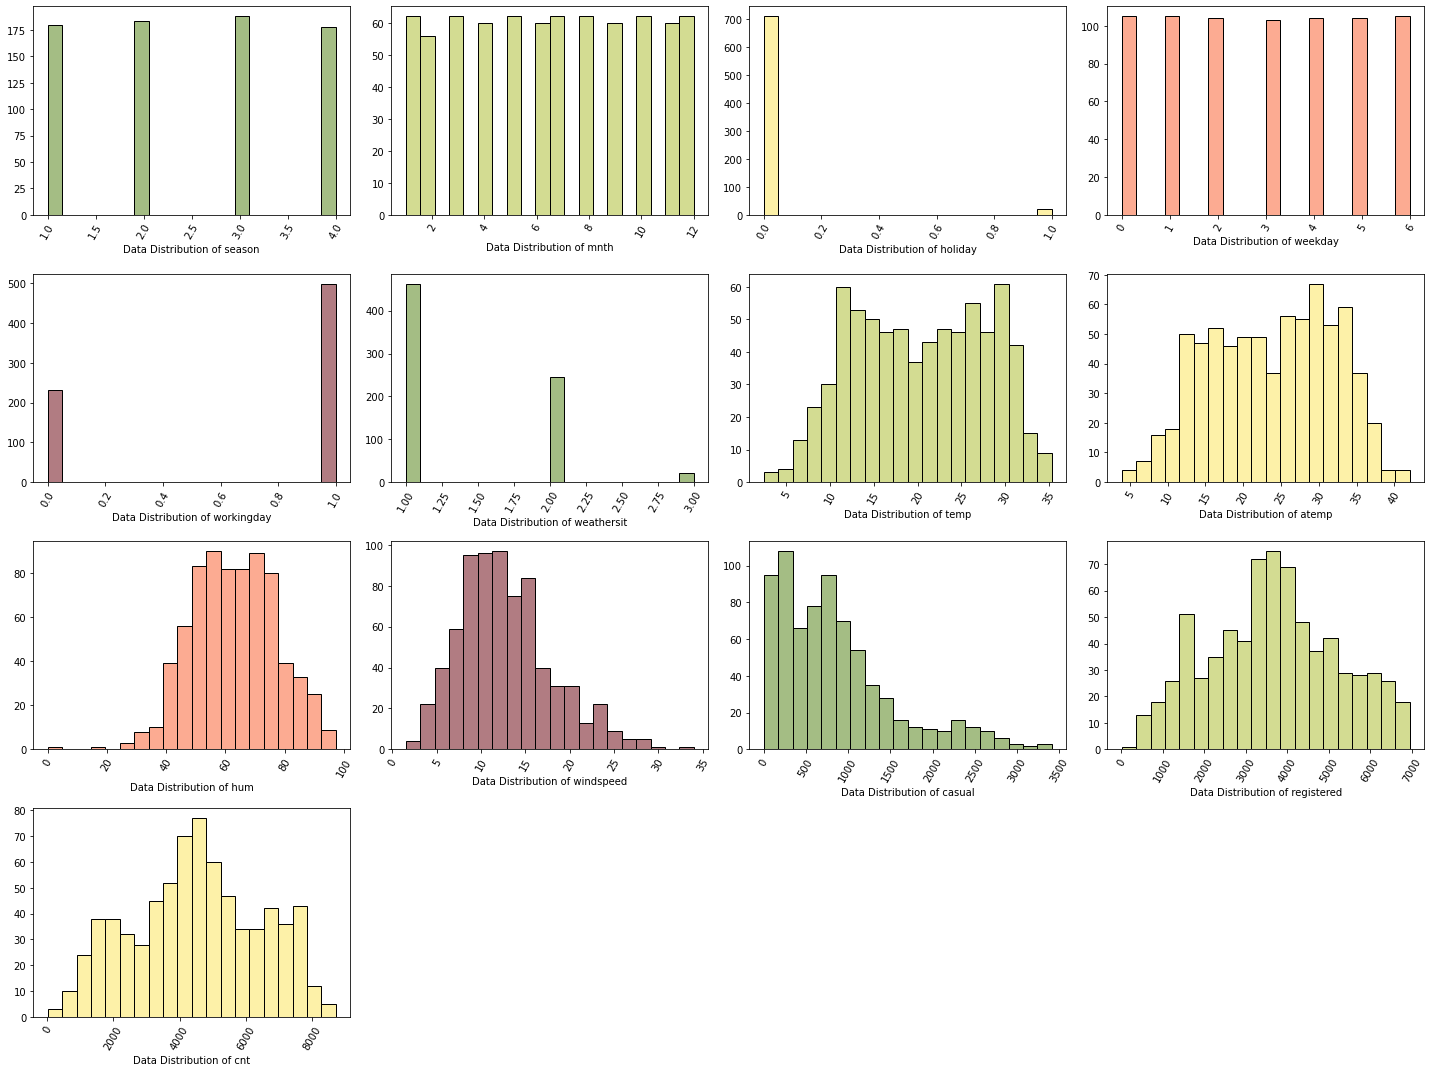

In [12]:
color_list = ['#A4BD84', '#D3DC92', '#FDF1A8', '#FCAB92', '#B17C82']
plt.figure(figsize=(20,15))
plt.title('Distribution of Numerical Features')
inx=1
for col in num_col_Numbers:
  colori = color_list[(inx - 1) % len(color_list)]
  plt.subplot(4,4,inx)
  plt.hist(df[col],bins=20,color=colori,edgecolor='black')
  plt.xlabel(f'Data Distribution of {col}')
  plt.xticks(rotation=60)
  inx=inx+1

plt.tight_layout()
plt.show()

In [13]:
df.dteday = pd.to_datetime(df.dteday,format="%d-%m-%Y")
df['year'] = df.dteday.dt.year.astype(int)

In [14]:
df.head()

,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,2018-01-01,1,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018
1,2018-01-02,1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018
2,2018-01-03,1,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018
3,2018-01-04,1,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018
4,2018-01-05,1,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018


# Understanding Relationship between Features

In [15]:
# scale numerical columns into (0-1) range 
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df[['temp', 'atemp','hum','windspeed','casual','registered','cnt']] = min_max_scaler.fit_transform(df[['temp', 'atemp','hum','windspeed','casual','registered','cnt']])

In [16]:
# scale days and month into cose and sine as they are categorical with order
df['day_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)
df['month_sin'] = np.sin(2 * np.pi * df['mnth'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['mnth'] / 12)
df['season_sin'] = np.sin(2 * np.pi * df['season'] / 4)
df['season_cos'] = np.cos(2 * np.pi * df['season'] / 4)

In [17]:
df.drop(['weekday','mnth','season','dteday'],axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     730 non-null    int64  
 1   workingday  730 non-null    int64  
 2   weathersit  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   casual      730 non-null    float64
 8   registered  730 non-null    float64
 9   cnt         730 non-null    float64
 10  year        730 non-null    int64  
 11  day_sin     730 non-null    float64
 12  day_cos     730 non-null    float64
 13  month_sin   730 non-null    float64
 14  month_cos   730 non-null    float64
 15  season_sin  730 non-null    float64
 16  season_cos  730 non-null    float64
dtypes: float64(13), int64(4)
memory usage: 102.7 KB


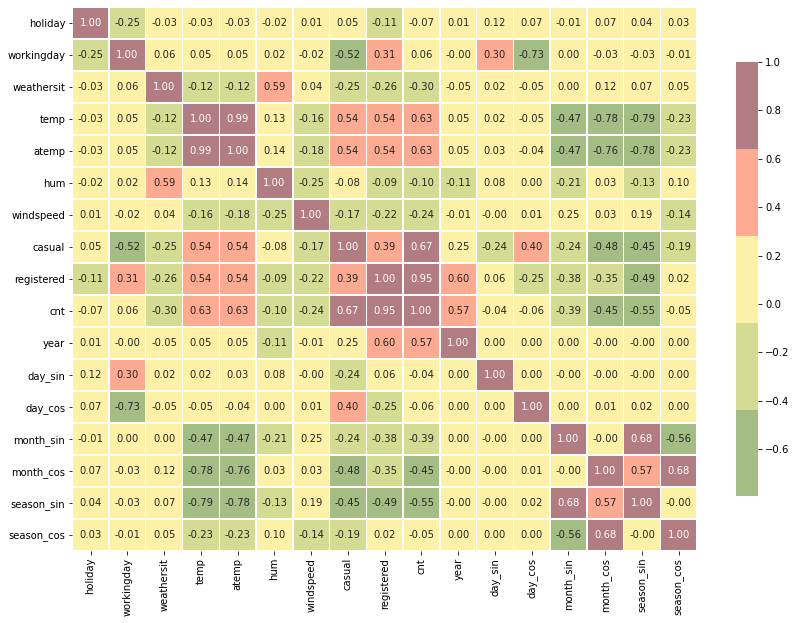

In [19]:
corrmat=df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(
    corrmat,
    cmap=color_list,       # your custom color list or colormap
    annot=True,            # show correlation values
    fmt=".2f",             # 2 decimal places
    linewidths=0.5,        # line between cells
    cbar_kws={"shrink": 0.8}  # colorbar size
)

In [20]:
df.drop(['atemp'],axis=1,inplace=True)
df.columns

Index(['holiday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'year', 'day_sin', 'day_cos',
       'month_sin', 'month_cos', 'season_sin', 'season_cos'],
      dtype='object')

In [21]:
num_col_Numbers=list(df.select_dtypes('number').columns)
print(f'There are {len(num_col_Numbers)} features : \n {num_col_Numbers}')

There are 16 features : 
 ['holiday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'year', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'season_sin', 'season_cos']


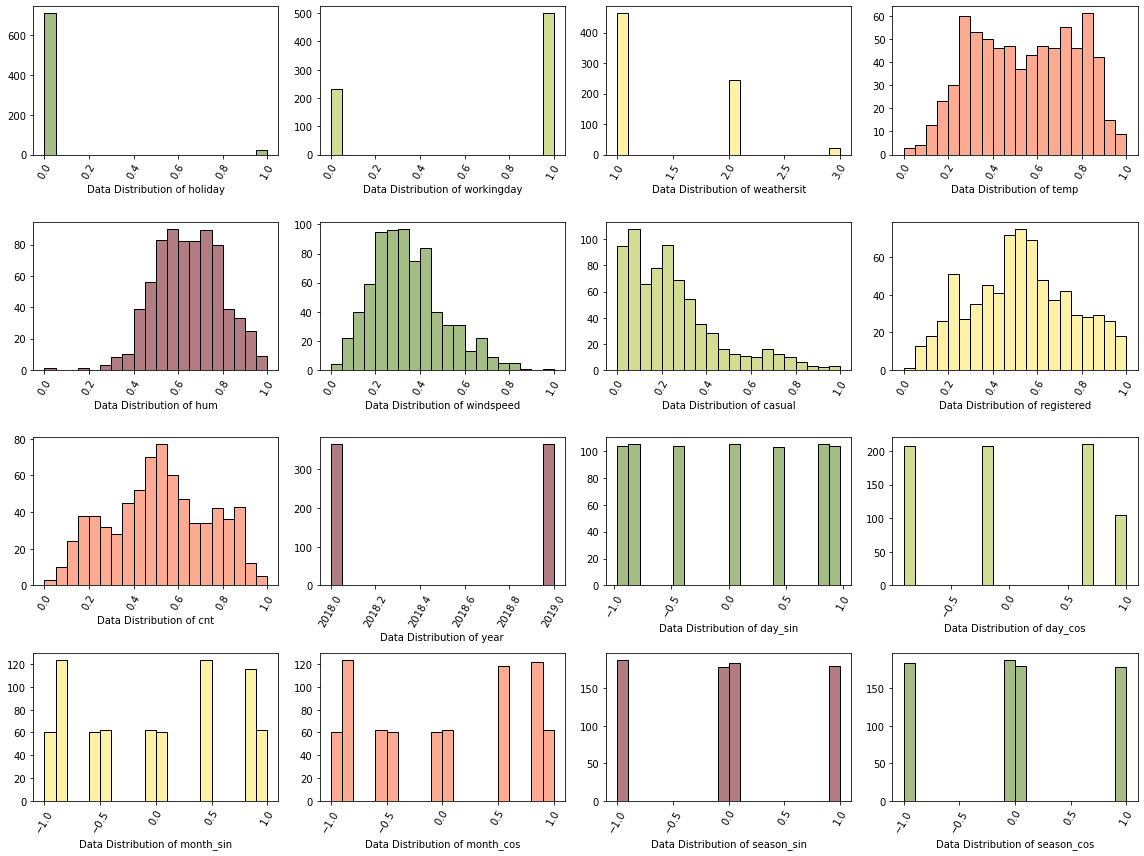

In [22]:
color_list = ['#A4BD84', '#D3DC92', '#FDF1A8', '#FCAB92', '#B17C82']
plt.figure(figsize=(16,12))
plt.title('Distribution of Features')
inx=1
for col in num_col_Numbers:
  colori = color_list[(inx - 1) % len(color_list)]
  plt.subplot(4,4,inx)
  plt.hist(df[col],bins=20,color=colori,edgecolor='black')
  plt.xlabel(f'Data Distribution of {col}')
  plt.xticks(rotation=60)
  inx=inx+1

plt.tight_layout()
plt.show()

Only year and weather sit are not scaled. Encode the categorical features such as year and weather sit.

In [23]:
df[[ 'year', 'day_sin', 'day_cos', 'month_sin',
       'month_cos', 'season_sin', 'season_cos']] = min_max_scaler.fit_transform(df[[ 'year', 'day_sin', 'day_cos', 'month_sin',
       'month_cos', 'season_sin', 'season_cos']])

In [24]:
df = pd.get_dummies(df, columns=['weathersit'], prefix='weather')
print(df['year'].value_counts())
print(df.columns)

1.0    365
0.0    365
Name: year, dtype: int64
Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'year', 'day_sin', 'day_cos', 'month_sin',
       'month_cos', 'season_sin', 'season_cos', 'weather_1', 'weather_2',
       'weather_3'],
      dtype='object')


In [25]:
print(f'{df.weather_1.value_counts()}\n{df.weather_2.value_counts()}\n{df.weather_3.value_counts()}')

1    463
0    267
Name: weather_1, dtype: int64
0    484
1    246
Name: weather_2, dtype: int64
0    709
1     21
Name: weather_3, dtype: int64


In [26]:
num_col_Numbers=list(df.select_dtypes('number').columns)

In [27]:
summary = pd.DataFrame({
    "Min": df.min(),
    "Max": df.max()
})

# Display only numeric columns
summary = summary.select_dtypes(include='number')

print(summary)

            Min  Max
holiday     0.0  1.0
workingday  0.0  1.0
temp        0.0  1.0
hum         0.0  1.0
windspeed   0.0  1.0
casual      0.0  1.0
registered  0.0  1.0
cnt         0.0  1.0
year        0.0  1.0
day_sin     0.0  1.0
day_cos     0.0  1.0
month_sin   0.0  1.0
month_cos   0.0  1.0
season_sin  0.0  1.0
season_cos  0.0  1.0
weather_1   0.0  1.0
weather_2   0.0  1.0
weather_3   0.0  1.0


## Correlation Matrix

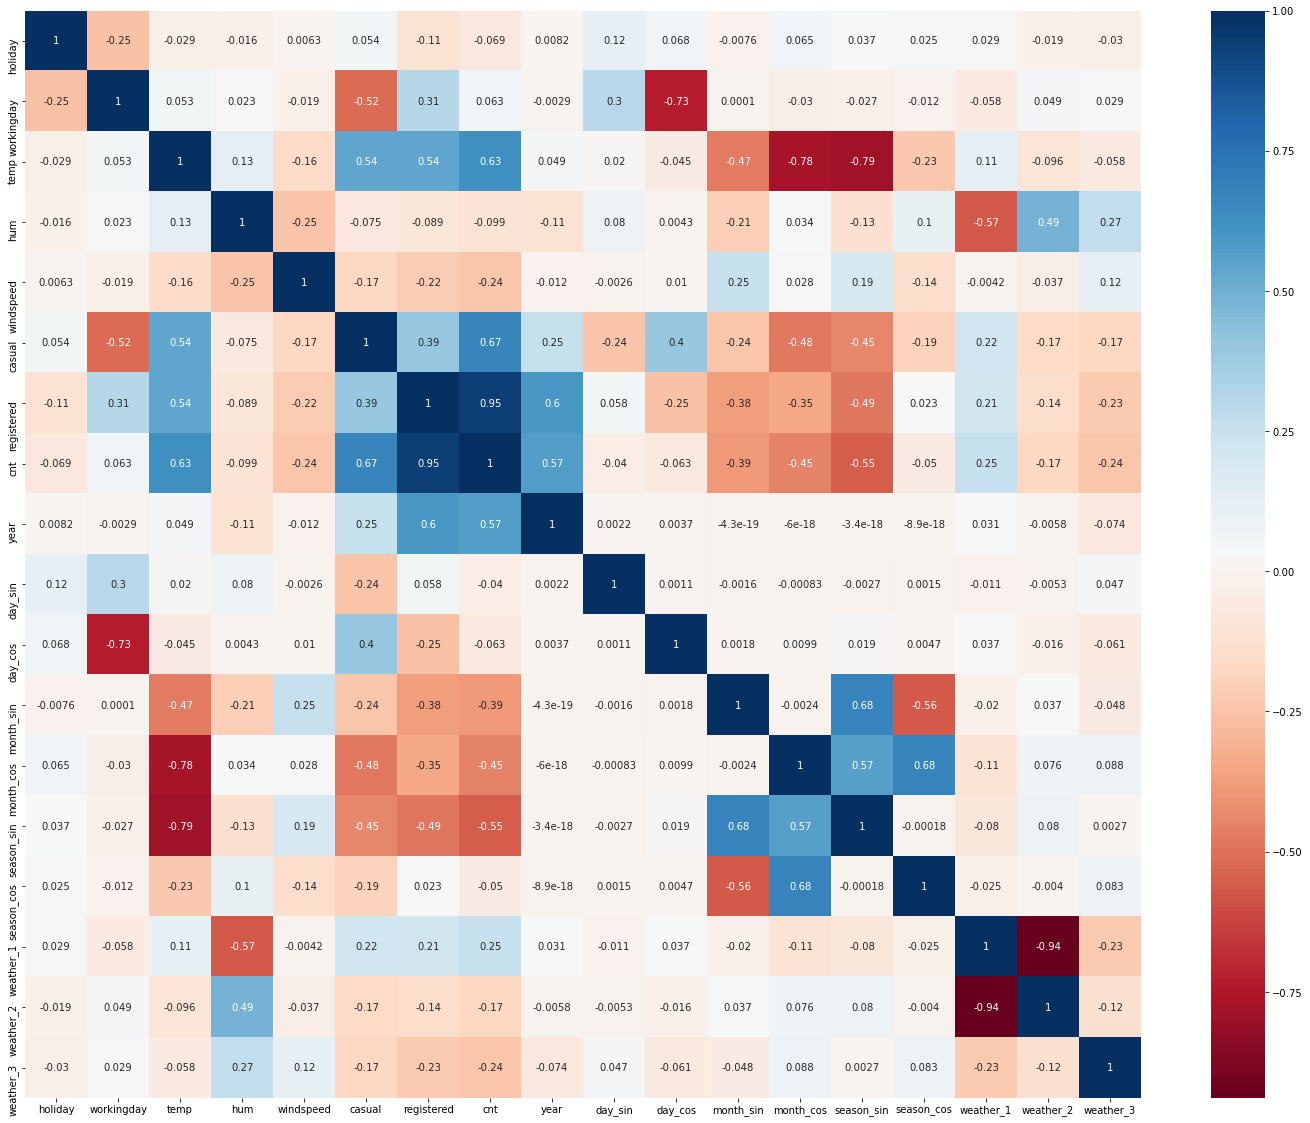

In [28]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.show()

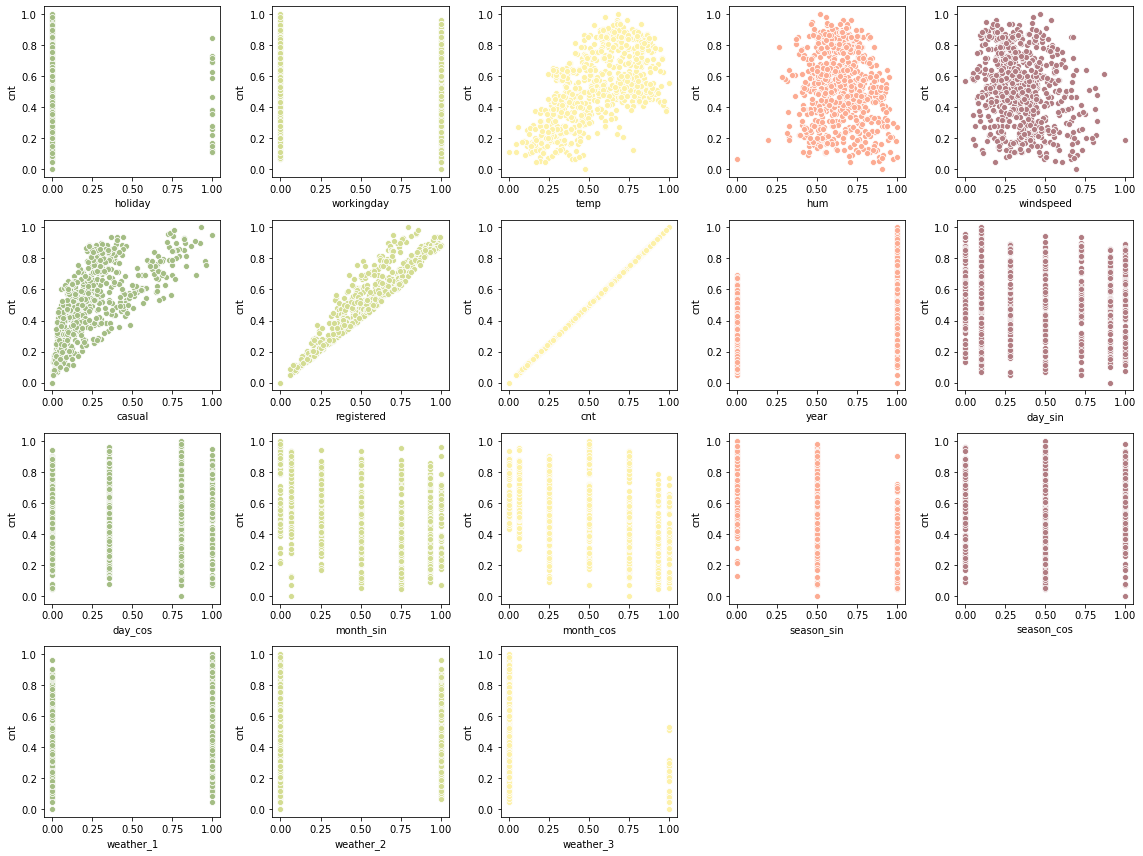

In [29]:
color_list = ['#A4BD84', '#D3DC92', '#FDF1A8', '#FCAB92', '#B17C82']
plt.figure(figsize=(16,12))
plt.title('Relationship of features with target feature')
inx=1
for col in list(df.columns):
  colori = color_list[(inx - 1) % len(color_list)]
  plt.subplot(4,5,inx)
  sns.scatterplot(x=col,y='cnt',color=colori,data=df)
  inx=inx+1

plt.tight_layout()
plt.show()

In [30]:
# Suppose X contains only independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df.drop(columns=['cnt'])  # drop target
X = X.astype(float)  # ensure all numeric

# Add constant for intercept
X_const = add_constant(X)

# Compute VIF
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i)
              for i in range(X_const.shape[1])]

print(vif)

       Feature       VIF
0        const  0.000000
1      holiday  1.230664
2   workingday  4.572614
3         temp  7.233620
4          hum  1.991670
5    windspeed  1.249913
6       casual  3.777520
7   registered  5.427849
8         year  2.585614
9      day_sin  1.413135
10     day_cos  2.725089
11   month_sin  5.276559
12   month_cos  8.752677
13  season_sin  4.851474
14  season_cos  4.766160
15   weather_1       inf
16   weather_2       inf
17   weather_3       inf


# BUILDING A LINEAR MODEL

In [31]:
x=df[['holiday','workingday','hum','windspeed','casual','year','day_sin','day_cos']]

In [32]:
y=df['cnt']
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test  = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def error_metrics(y_test,y_pred):
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² test Score:", r2_score(y_test, y_pred))

In [34]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
ytrain_calc = regressor.predict(x_train)
trainr2=r2_score(y_train, ytrain_calc)
print(f'Training R2 score is : {trainr2}')
error_metrics(y_test,y_pred)

Training R2 score is : 0.8146281589253852
RMSE: 0.09526329292532817
R² test Score: 0.7996894764836194


The regressor is performing good as the training r2 score and test r2 score are almost equal.(0.81~ 0.799)
It implies that the model is not overfitting.